# HOTEL BOOKING ANALYSES

# Problem Statement

**In recent years, both city hotels and resort hotels have experienced a notable increase in cancellation rates. This trend has led to a range of consequential challenges for each establishment, including diminished revenues and suboptimal utilization of hotel facilities. As a result, the primary objectives for both types of hotels are to mitigate these issues by lowering hotel rates, thereby enhancing efficiency in revenue generation. My analysis focuses on the examination of hotel booking cancellations, alongside other pertinent factors related to their core business operations and annual revenue generation.**

# Assumptions

**1) No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used. <br> 2) The information is still current and can be used to analyse the hotel's possible plans in an efficient manner. <br> 3) There are no unanticipated negatives to the hotel employing any adviced techniques. <br> 4) The biggest factor affecting the effectiveness of earning income is booking cancellations. <br> 5) The cancellations leads to the vacant room for the booked period of time. <br> 6) Clients make the hotel reservations the same year they make cancellations**

# Questions

**1) what are the variables that affect the hotel reservation cancellations? <br> 2) How can we reduce hotel reservation cancellation? <br> 3) How will hotels be assisted in making pricing and promotional decisions?**

# Analysis and Findings

# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
dataset = pd.read_csv('hotel_bookings.csv')

# Exploratory Data Analysis and Data Cleaning

In [5]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [7]:
dataset.shape

(119390, 32)

In [8]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**As we can see that the 'reservation_status_date' is in an object format so now we will convert it into date format.**

In [10]:
dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date'])

In [11]:
# Assuring if it's has been changed
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

**As we can see that 'reservation_status_date' column's datatype has been changed from 'object' to 'datetime'.**

In [12]:
dataset.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [13]:
for col in dataset.describe(include='object').columns:
    print(col)
    print(dataset[col].unique())
    print('-'*60)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [14]:
# To check the missing values
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# Removing the 'agent' and 'company' column:
dataset.drop(['agent','company'],axis = 1,inplace = True)

In [16]:
# Removing the null values from the dataset
dataset.dropna(inplace = True)

In [17]:
# Now checking the missing values again
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**As we can see in the above data that all the null values or missing values has been removed.**

In [18]:
# Checking the summary statistics of numerical data
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

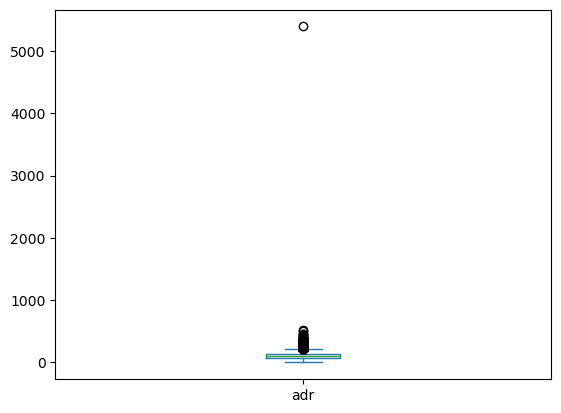

In [19]:
dataset['adr'].plot(kind = 'box')

**As we can see in the above graph that all the data are below 1000 and there's only single value that is above 5000 so it is an outlier and we have to remove it.**

In [20]:
dataset = dataset[dataset['adr']<5000]

In [21]:
# Checking if the outlier has been removed or not
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


**As the data has been cleaned now we will perform the analysis**

# Data Analysis and visualizations

In [22]:
# Calculating percentage
cancelled_perc = dataset['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


**As we can see around 62.8% of reservations are not cancelled whereas around 37.1% of the reservations are being cancelled.**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


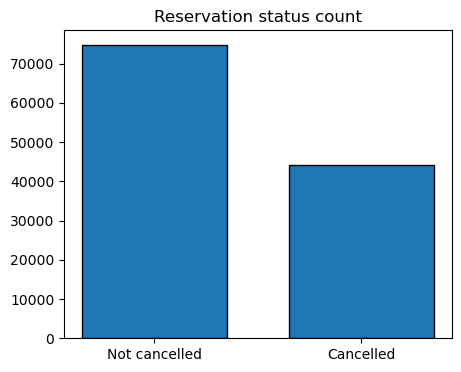

In [23]:
cancelled_perc = dataset['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled', 'Cancelled'],dataset['is_canceled'].value_counts(),edgecolor = 'k',width = 0.7)
plt.show()

**As we can see the cancellation rate is almost nearly more than half.**

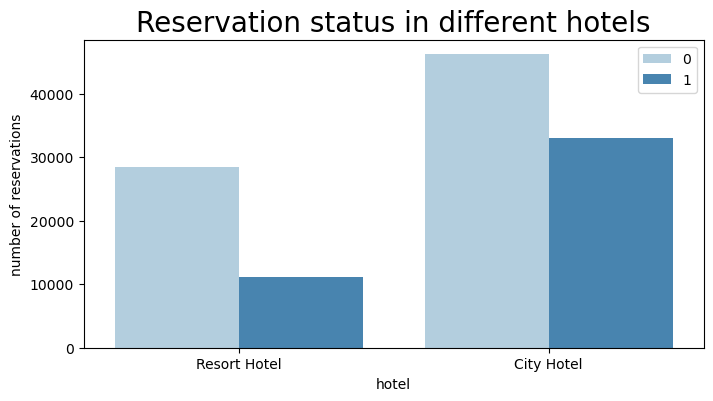

In [24]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel',hue = 'is_canceled', data = dataset, palette = 'Blues')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()

In [25]:
# To get percentage of cancelled and non cancelled reservation for resort hotels
resort_hotel = dataset[dataset['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

**From the above analysis we can see that around 28% of the reservation has been cancelled and 72% aren't for RESORT_HOTELS.**

In [26]:
# To get percentage of cancelled and non cancelled reservation for city hotels
city_hotel = dataset[dataset['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

**From the above analysis we can see that around 41.7% of reservation has been cancelled and 58.2 aren't for CITY_HOTELS.**

In [27]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

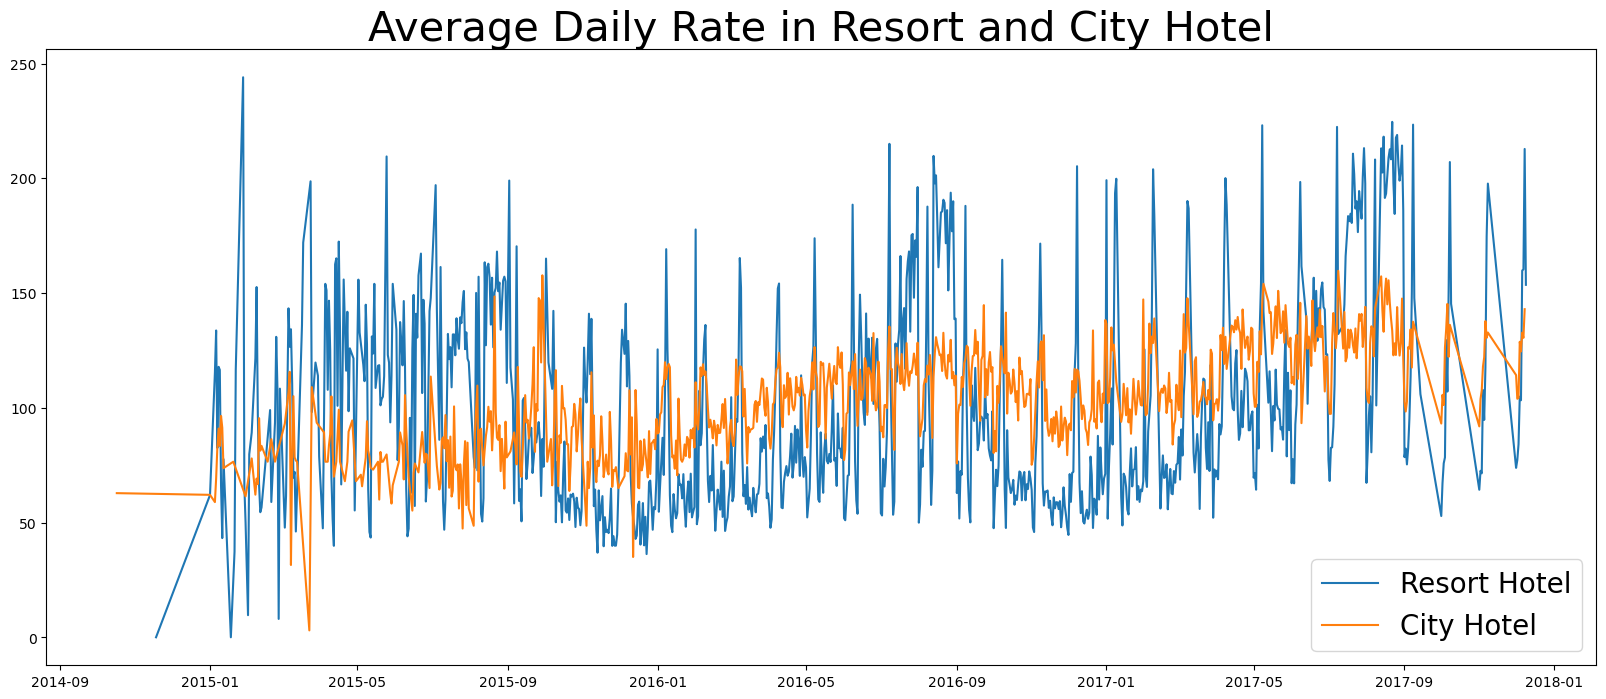

In [28]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in Resort and City Hotel' , fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel') 
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

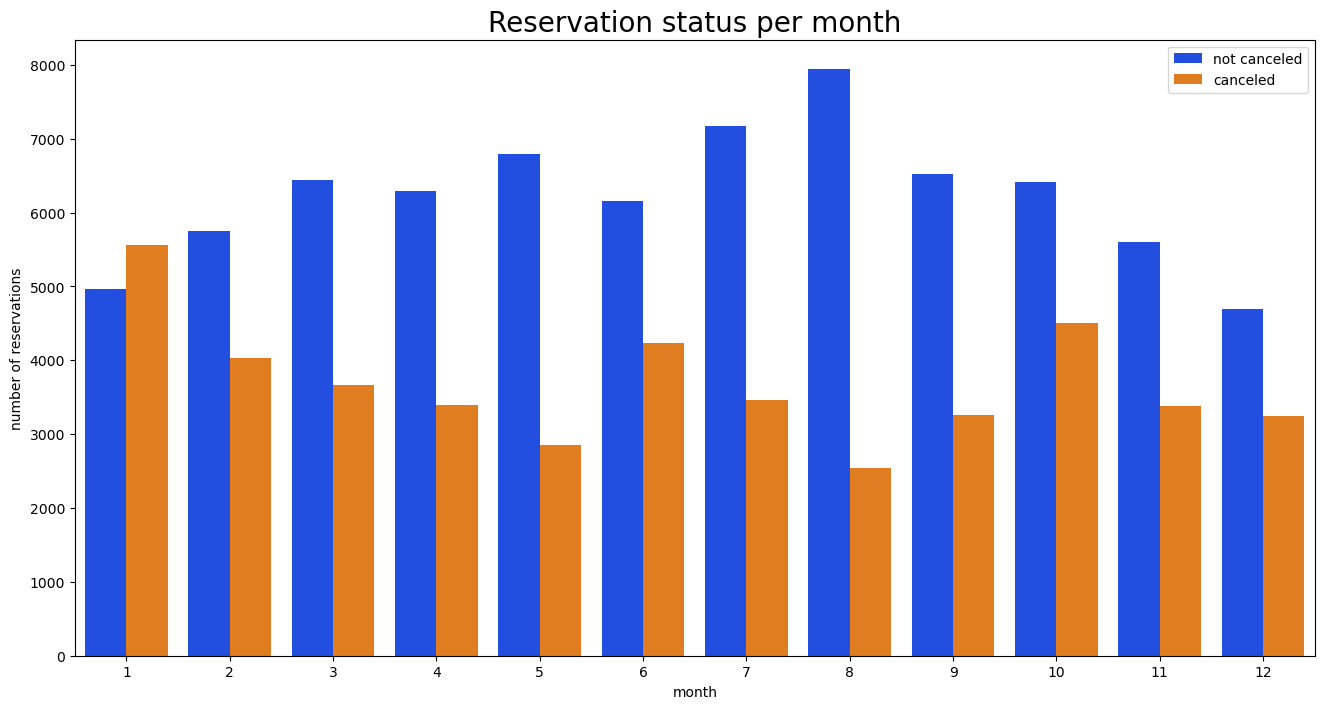

In [29]:
dataset['month'] = dataset['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month',hue = 'is_canceled',data = dataset , palette = 'bright')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month' , size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled' , 'canceled'])
plt.show()

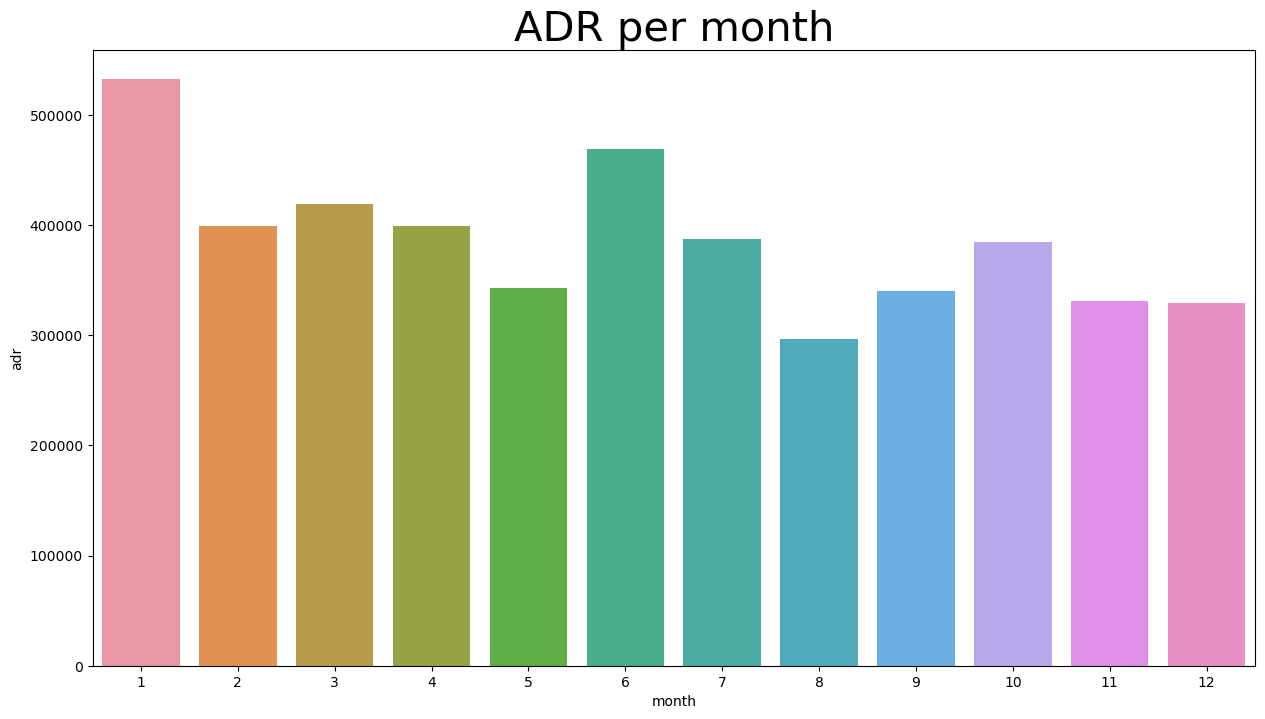

In [30]:
plt.figure(figsize = (15,8))
plt.title('ADR per month',fontsize = 30)
sns.barplot(x = 'month', y = 'adr', data = dataset[dataset['is_canceled'] == 1].groupby('month',as_index = False).sum())
                                        
plt.show()

**From the analysis we can see that in the 'ADR PER MONTH GRAPH' ADR rate is lowest in the month of AUGUST and in the 'RESERVATION STATUS PER MONTH GRAPH' the lowest cancellation is in the same month , similarly the 'ADR' rate is highest in the month of JANUARY and eventually cancellation rate is the highest in the same month. So it proves that HIGHER PRICE leads to HIGHER CANCELLATION.**

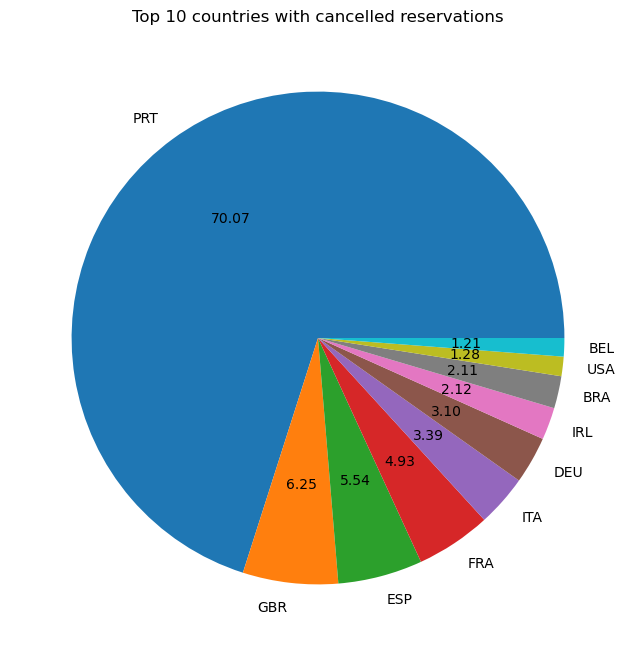

In [31]:
cancelled_data = dataset[dataset['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize =(8,8))
plt.title('Top 10 countries with cancelled reservations')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()


**From the above Pie chart we can see that the highest rate of cancellation is in the Portugal Country followed by United Kingdom, Spain, France, Italy etc.**

**To enhance the overall guest experience and mitigate cancellation rates:
It is advisable to augment the spectrum of offered services and amenities, encompassing accommodation, recreational pursuits, entertainment options, and cutting-edge technological features.
Striking a delicate balance, the establishment should maintain a decent range of pricing structures to cater to diverse clients, ensuring accessibility without compromising on the quality of services provided.
Implementing strategic promotional initiatives, such as enticing discounts and thoughtfully crafted campaigns, will not only boost the hotel's market visibility but also serve as an alluring incentive for prospective guests. 
Furthermore, investing in advertising campaigns will disseminate awareness, positioning the hotel as a premier destination for a comprehensive and enriching hospitality experience.
By consistently adhering to these strategic considerations, the establishment endeavors to not only reduce cancellation rates but also foster a positive trajectory in guest engagement and loyalty over the course of time.**

In [32]:
# Checking the ratio of different mode of reservations
dataset['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

**Upon examination of the data, it becomes apparent that a substantial majority, surpassing 56,000 customers, opt for reservations through online travel agents, while an additional cohort exceeding 24,000 chooses offline travel agents. In contrast, the segment of direct customers engaging in reservations directly with the establishment stands at approximately 12,000.**

In [33]:
# Checking the percentage of the same
dataset['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

**Contrary to the initial hypothesis positing a higher ratio of customers through offline travel agents, the empirical analysis reveals that approximately 47% of customers opt for online travel agents, while around 20% choose offline travel agents for making the reservation. This dissonance between the hypothesis and the observed distribution proves that customers predominantly favor online channels more for reservations.**

In [34]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

**The observed data indicates a noteworthy trend wherein the highest rate of cancellations emanates from reservations made through online channels. This suggests that a substantial portion of the approximately 47% of reservations conducted via online mediums eventually results in cancellations, accentuating the parity between reservation and cancellation rates within this specific booking avenue.** 

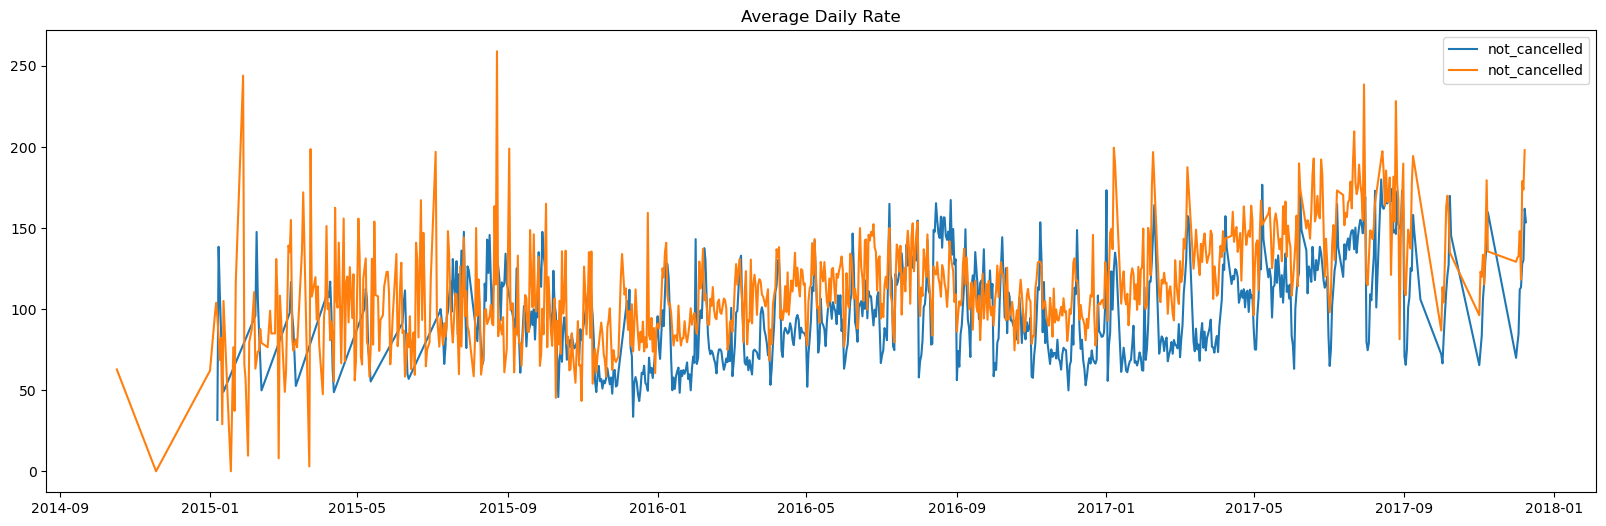

In [35]:
cancelled_dataset_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_dataset_adr.reset_index(inplace = True)
cancelled_dataset_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = dataset[dataset['is_canceled']==0]
not_cancelled_dataset_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_dataset_adr.reset_index(inplace = True)
not_cancelled_dataset_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_dataset_adr['reservation_status_date'],not_cancelled_dataset_adr['adr'],label = 'not_cancelled')
plt.plot(cancelled_dataset_adr['reservation_status_date'],cancelled_dataset_adr['adr'],label = 'not_cancelled')
plt.legend()

In [36]:
cancelled_dataset_adr = cancelled_dataset_adr[(cancelled_dataset_adr['reservation_status_date']>'2016') & (cancelled_dataset_adr['reservation_status_date']<'2017-09')]
not_cancelled_dataset_adr = not_cancelled_dataset_adr[(not_cancelled_dataset_adr['reservation_status_date']>'2016') & (not_cancelled_dataset_adr['reservation_status_date']<'2017-09')]

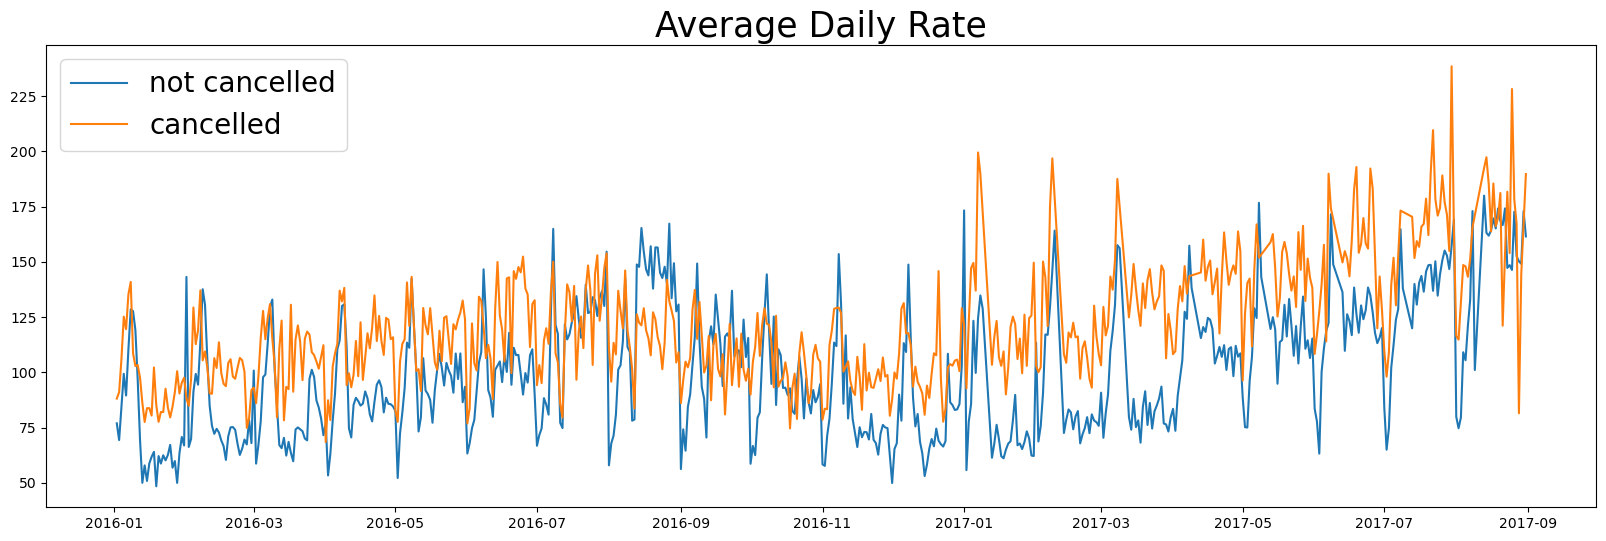

In [38]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize = 25)
plt.plot(not_cancelled_dataset_adr['reservation_status_date'],not_cancelled_dataset_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_dataset_adr['reservation_status_date'],cancelled_dataset_adr['adr'], label = 'cancelled')
plt.legend(fontsize=20)
plt.show()

**This analysis demonstrates a clear correlation between price and cancellation rates in hotels, particularly highlighting the significant influence of average daily rates, wherein an increase in the average rate corresponds to a rise in cancellation rates.**

# SUGGESTIONS

**1) The increase of cancellation rates correlates positively with pricing increments. To reduce reservation cancellations, hotels could refine their pricing strategies, considering location-specific adjustments to rates and offering discounts to clients. <br> 2) Given the elevated cancellation-to-booking ratio observed in resort hotels compared to city hotels, it is advisable for such establishments to make discounts on rooms during weekends and holidays. <br> 3) In January, hotels may initiate marketing campaigns with reasonable amount to boost revenue streams, as cancellations are higher during this period. <br> 4) Enhancing the quality of accommodations and services, particularly in Portugal, represents a viable strategy for reducing cancellation rates.**